In [1]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def merge_masks(masks):
    n_masks = np.concatenate([masks, masks, masks], -1)
    merged = np.zeros((n_masks.shape[1:]))
    colors = np.random.randint(0, 255, (n_masks.shape[0], 3))
    for m, c in zip(n_masks, colors):
        merged += c * m
        
    return merged.astype(int)

## Read Input Data

In [3]:
image = cv2.imread('../samples/people_002.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

depth_map = np.load('../samples/people_002_disp.npy')[0, 0]

masks = np.load('../samples/people_002_masks.npy')

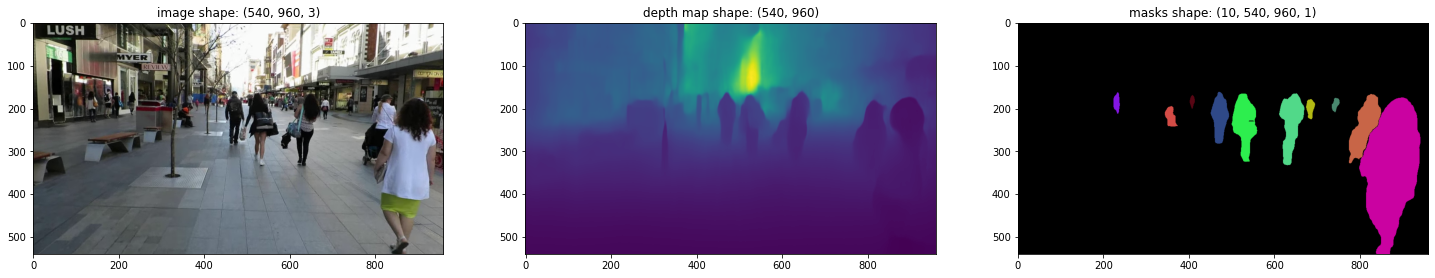

In [4]:
plt.figure(figsize=(25,10))

plt.subplot(1, 3, 1)
plt.title(f"image shape: {image.shape}")
plt.imshow(image)

plt.subplot(1, 3, 2)
plt.title(f"depth map shape: {depth_map.shape}")
plt.imshow(depth_map)

plt.subplot(1, 3, 3)
plt.title(f"masks shape: {masks.shape}")
plt.imshow(merge_masks(masks))

## Merge Input Data

In [138]:
res_img = image.copy()
colors = np.random.randint(0, 255, (masks.shape[0], 3))

for m, c in zip(masks, colors):
    person_depth = depth_map * np.squeeze(m, -1)
    avg_depth = person_depth[np.where(person_depth != 0)].mean()
    x, y = int(np.where(person_depth != 0)[0].mean()), int(np.where(person_depth != 0)[1].mean())
    
    CENTER = (y, x)
    res_img = cv2.circle(res_img, CENTER, int(math.e ** (-avg_depth/2) * 100), tuple([int(x) for x in c]), -1)
    
    TEXT_FACE = cv2.FONT_HERSHEY_DUPLEX
    TEXT_SCALE = 0.8 * (10 - avg_depth) / 10
    TEXT_THICKNESS = 1
    TEXT = f"{avg_depth:.2f}m"

    text_size, _ = cv2.getTextSize(TEXT, TEXT_FACE, TEXT_SCALE, TEXT_THICKNESS)
    text_origin = (CENTER[0] - text_size[0] // 2, CENTER[1] + text_size[1] // 2)
    cv2.putText(res_img, TEXT, text_origin, TEXT_FACE, TEXT_SCALE, (255,255,255), TEXT_THICKNESS, cv2.LINE_AA)
    
    res_img = cv2.addWeighted(res_img, 1, (c * np.concatenate([m, m, m], -1)).astype(np.uint8), 0.3, 0)

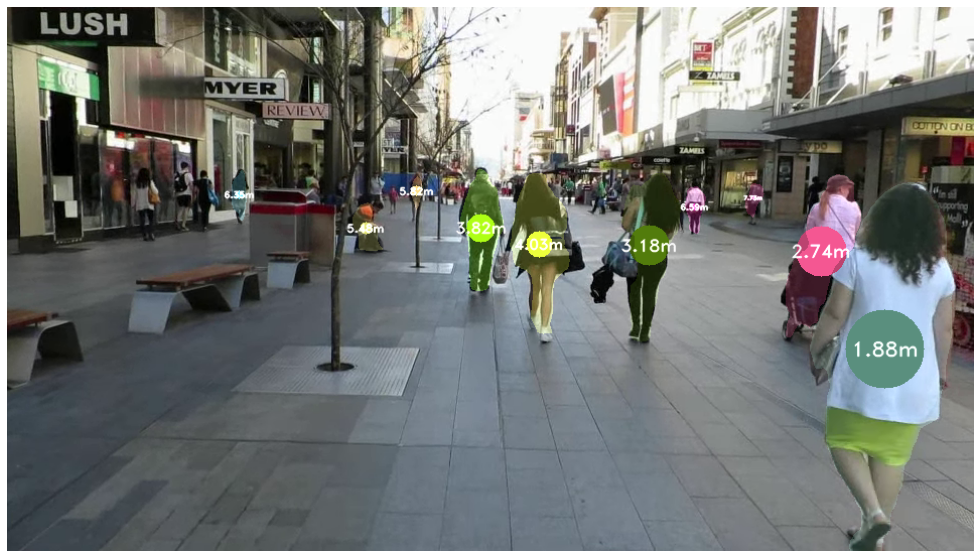

In [143]:
plt.figure(figsize=(25,10))

plt.imshow(res_img)
plt.axis('off')
plt.savefig("test.png", bbox_inches='tight', dpi=600)
plt.show()
